# L’assurance-maladie obligatoire suisse dans l’impasse. Une analyse du

compromis socio-politique derrière la Loi fédérale sur l’assurance-maladie (LAMal)

Celâl Güney [](https://orcid.org/0009-0008-2601-030X) (unige)  
Gaia Valenti (unige)  
February 27, 2026

# 1. Annexe

## 1.1 Stratégie empirique pour les modèles de la section 4

La spécification des modèles présentés dans la section 4 a pour objectif de reproduire une analyse néoréaliste des facteurs influençant les attentes sociales. Les variables dépendantes sont binarisées afin de conduire des estimations de modèles logistiques binaires en utilisant l’estimation du maximum de vraisemblance. La variable d’opinion sur l’augmentation de la franchise minimale de l’assurance-maladie de base est construite sur une échelle Likert de 1 (fortement contre) à 5 (fortement pour). Nous avons créé une variable dichotomique pour les deux premières catégories (fortement contre et contre). Pour le choix du vote pour l’initiative d’allègement des primes, nous avons dichotomisé en binarisant le vote en faveur de l’initiative. Les principales variables explicatives que nous avons considérées sont un indice de classe sociale mesurée par la classification européenne des groupes socioéconomiques (ESEG), le revenu mensuel brut du ménage, à partir duquel nous calculons le niveau de revenu par décile, ainsi qu’une batterie d’indicateurs socio-démographiques (âge, langue, cantons, genre) et idéologiques (auto-positionnement gauche-droite, vote, probabilité de vote pour les principaux partis politiques, opinions sur des sujets économiques et identitaires). Pour chacune de nos deux variables dépendantes, nous avons procédé à une sélection de modèle pas à pas descendante avec le critère d’information d’Akaike (AIC). Cette procédure a abouti au modèle suivant pour l’opposition à l’augmentation de la franchise minimale:

<span id="eq-1">$$
P(y_i = 1) = logit^{-1}(\beta_0 + \beta_{d}D_i + \beta X_i + \gamma_p P_i + \eta_o O_i + \epsilon_i) 
 \qquad(1)$$</span>

Avec $P(y_i = 1)$ la probabilité de l’individu $i$ d’être contre l’augmentation de la franchise minimale, $D_i$ le niveau de décile auquel appartient l’individu $i$, $X_i$ un vecteur de caractéristiques individuelles socio-démographique (âge, genre, langue), $P_i$ un vecteur de variable sur la probabilité de voter pour certains partis politiques suisses (Le Centre, le Parti Socialiste, les Verts et les Verts Libéraux) sur une échelle de 0 à 10, et $O_i$ l’opinion sur une série d’enjeux comme l’intégration européenne, le salaire minimum ou encore les dépenses sociales. $\epsilon_i$ est le terme d’erreur. De manière surprenante, la variable pour les groupes socio-économiques ESEG n’a pas été retenue par la procédure de sélection, ce qui implique que la classe sociale telle que mesurée par l’indice ESEG ne semble pas jouer un rôle déterminant par rapport au niveau de revenu et aux autres variables de contrôle Comme le schéma de classe ESEG est une variable importante pour notre analyse, nous considérons quand même les résultats d’une régression simple de nos deux variables dépendantes sur les catégories socio-professionnelles ESEG (résultats disponibles dans l’annexe). Encore plus étonnant, la variable contrôlant pour les cantons n’a pas non plus été retenue, ce qui suggère que l’effet d’appartenance à un canton est négligeable. Le coefficient de corrélation interclasse (ICC) calculé à partir d’un modèle multiniveau avec les cantons en tant que niveau confirme que les variations entre cantons sont faibles (voir annexe). Le modèle pour le vote en faveur de l’initiative pour l’allègement des primes prend une forme similaire à (1), avec quelques différences au niveau des variables retenues car certaines d’entre elles n’étaient pas disponible dans la quatrième vague. Comme pour le premier modèle, le schéma de classe ESEG n’a pas été retenu par la procédure de sélection, ni le canton de résidence.

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.2.0     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.2     ✔ tibble    3.3.1
✔ lubridate 1.9.5     ✔ tidyr     1.3.2
✔ purrr     1.2.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

e.g.:
  dat <- vroom(...)
  problems(dat)

## 1.2 Matériel supplémentaire

In [ ]:
library(haven)
library(tidyverse)
library(marginaleffects)
library(sjlabelled)


Attachement du package : 'sjlabelled'

Les objets suivants sont masqués depuis 'package:haven':

    as_factor, read_sas, read_spss, read_stata, write_sas, zap_labels

L'objet suivant est masqué depuis 'package:forcats':

    as_factor

L'objet suivant est masqué depuis 'package:dplyr':

    as_label

L'objet suivant est masqué depuis 'package:ggplot2':

    as_label

! ISCO variable is not a character. Beware that numeric ISCO variables possibly contain lost data. See https://cimentadaj.github.io/DIGCLASS/articles/repairing_isco_input.html for more details. Converting to a character vector.

ℹ ISCO variable has occupations with digits less than 4. Converting to 4 digits.

• Converted `100` to `0100`

• Converted `200` to `0200`

• Converted `300` to `0300`

In [ ]:
library(MASS)


Attachement du package : 'MASS'

L'objet suivant est masqué depuis 'package:dplyr':

    select

In [ ]:
library(haven)
library(tidyverse)
library(marginaleffects)
library(sjlabelled)
library(DIGCLASS)


# function to recode party satisfaction variables to put "don't know" as middle value

recode_party_satisfaction = function(var){
  new_var = case_when(
    var == 1 ~ 1,
    var == 2 ~ 2, 
    var == 8 ~ 3, 
    var == 3 ~ 4,
    var == 4 ~ 5
  )
}


selects2023panelW4 <-  read_sav("data/selects2023panelW4/data/2626_Selects2023_Panel_Data_v2.0.sav")

selects2023panelW4$isco08 = selects2023panelW4$W1_4_f21601_2dig*100

selects2023panelW4_2 = selects2023panelW4  %>% 
  rename(
    vote_choice = "W4_f10851main6",
    feelings_udc = 'W4_f14177a',
    feelings_ps = 'W4_f14177b',
    feelings_centre = 'W4_f14177c',
    feelings_plr = 'W4_f14177d',
    feelings_verts = 'W4_f14177e',
    feelings_vertslib = 'W4_f14177f',
    
    op_gender_equality = 'W4_f15475',
    op_state_intervention = 'W4_f15435', # 5 = for more competition
    op_2many_worries_abt_env_vs_prices = 'W4_f15478',
    op_min_wage = 'W4_f15815', # 4 = strongly in favor
    op_incr_retirement_age = 'W4_f15811',
    op_foreigners_votingrights = 'W4_f15816',
    op_rights_samesex_couples = 'W4_f15817'
    
    
    
  ) %>% 
  mutate(
    income = case_when(
  W4_f28910 == 1  ~ (0+2000)/2,
  W4_f28910 == 2  ~ (2001+3000)/2,
  W4_f28910 == 3  ~ (3001+4000)/2,
  W4_f28910 == 4  ~ (4001+5000)/2,
  W4_f28910 == 5  ~ (5001+6000)/2,
  W4_f28910 == 6  ~ (6001+7000)/2,
  W4_f28910 == 7  ~ (7001+8000)/2,
  W4_f28910 == 8  ~ (8001+9000)/2,
  W4_f28910 == 9  ~ (9001+10000)/2,
  W4_f28910 == 10 ~ (10001+11000)/2,
  W4_f28910 == 11 ~ (11001+12000)/2,
  W4_f28910 == 12 ~ (12001+13000)/2,
  W4_f28910 == 13 ~ (13001+14000)/2,
  W4_f28910 == 14 ~ (14001+15000)/2,
  W4_f28910 == 15 ~ (15001+16000)/2,
  W4_f28910 == 16 ~ (16001+17000)/2,
  W4_f28910 == 17 ~ (17001+18000)/2,
  W4_f28910 == 18 ~ (18001+19000)/2,
  W4_f28910 == 19 ~ (19001+20000)/2,
  W4_f28910 == 20 ~ 20001         
),

language = factor(as_label(W4_langint)),
gender = factor(as_label(W4_sex)),

rec_satisf_plr = recode_party_satisfaction(W4_f13743a),
rec_satisf_centre = recode_party_satisfaction(W4_f13743b),
rec_satisf_ps = recode_party_satisfaction(W4_f13743c),
rec_satisf_udc = recode_party_satisfaction(W4_f13743d),
rec_satisf_verts = recode_party_satisfaction(W4_f13743e),

income_decile = ntile(income, n = 10),
income_adjusted = income/sqrt(W4_f20500), # W4_f20500 = household size, including R
income_adj_decile = ntile(income_adjusted, n = 10),

lr = if_else(W4_f15200 == 98 | is.na(W4_f15200), NA, W4_f15200),

education_ISCED = case_when(
  W4_f21310rec %in% c(1, 2) ~ 1,  # No education, Primary = ISCED 1
  W4_f21310rec == 3        ~ 2,  # Secondary school = ISCED 2
  W4_f21310rec %in% c(4,5) ~ 3,  # Basic vocational training, apprenticeship = ISC4D 3
  W4_f21310rec %in% c(6,7,8) ~ 4, # Upper secondary specialized, tra4e, vocational = ISCED 4 
  W4_f21310rec == 9 ~ 5,  # Matu = ISCED 5
  W4_f21310rec == 10 ~ 5,  # Higher vocational education with federal dip4oma = ISCED 5
  W4_f21310rec == 11 ~ 6,  # College of higher education = ISCED 6
  W4_f21310rec == 12 ~ 6,  # Uni of applied sciences = ISCED 6 (Ba4helor level)
  W4_f21310rec == 13 ~ 7,  # University / Federal Institute of Tec4nology = ISCED 7 (Master)
  W4_f21310rec == 14 ~ NA   # other
),

public_sector = if_else(W1_4_f21700 == 2, 1, 0),
canton = as_character(W4_canton_sample),
langue = relevel(factor(as_character(W4_langint)), ref = "German"),

#isco08_4d = isco08_swap(W1_ISCO08prof_2dig, from = 2, to = 3),

main_activity = case_when(
  
  # comme il s'agit de la 4eme vague, la question si la situation de travail a changé doit etre prise en compte, si W4_f21300 == 0, la situation n'a pas changé depuis vague 1 (W1)
  W4_f21300 == 0 & W1_f21400 %in% c(1, 2, 7) ~ 1, # working
  W4_f21300 == 0 & W1_f21400 %in% c(3) ~ 2, # in training/education
  W4_f21300 == 0 & W1_f21400 %in% c(6) ~ 3, # disability
  W4_f21300 == 0 & W1_f21400 %in% c(4, 8) ~ 4, # no paid work
  W4_f21300 == 0 & W1_f21400 %in% c(5) ~ 5, # retired
  
  W4_f21300 == 1 & W4_f21400 %in% c(1, 2, 7) ~ 1, # working
  W4_f21300 == 1 & W4_f21400 %in% c(3) ~ 2, # in training/education
  W4_f21300 == 1 & W4_f21400 %in% c(6) ~ 3, # disability
  W4_f21300 == 1 & W4_f21400 %in% c(4, 8) ~ 4, # no paid work
  W4_f21300 == 1 & W4_f21400 %in% c(5) ~ 5 # retired
  
),

# Prise en compte du changement depuis W1, comme pour main_activity
work_status = case_when(
  W4_f21300 == 0 & W1_f21500 == 4 ~ 1, # self-employed
  W4_f21300 == 0 & W1_f21500 %in% c(1, 2, 3) ~ 0, # employee
  W4_f21300 == 0 & is.na(W1_f21500) ~ 2, # not employed
  
  W4_f21300 == 1 & W4_f21500 == 4 ~ 1, # self-employed
  W4_f21300 == 1 & W4_f21500 %in% c(1, 2, 3) ~ 0, # employee
  W4_f21300 == 1 & is.na(W4_f21500) ~ 2 # not employed
),


main_activity2 = case_when(
  
  W1_4_f21400 %in% c(1, 2, 7) ~ 1, # working
  W1_4_f21400 %in% c(3) ~ 2, # in training/education
  W1_4_f21400 %in% c(6) ~ 3, # disability
  W1_4_f21400 %in% c(4, 8) ~ 4, # no paid work
  W1_4_f21400 %in% c(5) ~ 5 # retired
  
),

work_status2 = case_when(
  W1_4_f21500 == 4 ~ 1, # self-employed
  W1_4_f21500 %in% c(1, 2, 3) ~ 0, # employee
  is.na(W1_4_f21500) ~ 2 # not employed
),


eseg = isco08_to_eseg(isco08, work_status = work_status2, main_activity = main_activity2, age = W4_age, to_factor = FALSE, type = "two-digit", label = FALSE),

yes_premium_initiative = if_else(W4_f10771a == 1, 1,
                                 if_else(is.na(W4_f10771a), NA, 0)),

yes_biodiversity_initiative =  if_else(W4_f10751a == 1, 1,
                                 if_else(is.na(W4_f10751a), NA, 0)),

yes_pension_reform = if_else(W4_f10751b == 1, 1,
                                 if_else(is.na(W4_f10751b), NA, 0)),

yes_13th_pension_payment = if_else(W4_f10791 == 1, 1,
                                 if_else(is.na(W4_f10791), NA, 0)),

  
)

! ISCO variable is not a character. Beware that numeric ISCO variables possibly contain lost data. See https://cimentadaj.github.io/DIGCLASS/articles/repairing_isco_input.html for more details. Converting to a character vector.

ℹ ISCO variable has occupations with digits less than 4. Converting to 4 digits.

• Converted `200` to `0200`

• Converted `300` to `0300`

• Converted `100` to `0100`

! ISCO variable is not a character. Beware that numeric ISCO variables possibly contain lost data. See https://cimentadaj.github.io/DIGCLASS/articles/repairing_isco_input.html for more details. Converting to a character vector.

ℹ ISCO variable has occupations with digits less than 4. Converting to 4 digits.

• Converted `200` to `0200`

• Converted `300` to `0300`

• Converted `100` to `0100`

In [ ]:
library(lme4)

Le chargement a nécessité le package : Matrix


Attachement du package : 'Matrix'

Les objets suivants sont masqués depuis 'package:tidyr':

    expand, pack, unpack


Attachement du package : 'lme4'

L'objet suivant est masqué depuis 'package:marginaleffects':

    refit

In [ ]:
library(gtsummary)


Attachement du package : 'gtsummary'

L'objet suivant est masqué depuis 'package:MASS':

    select

In [ ]:
library(ggstats)


selects2023panel2 %>% 
  select(op_limit_immigration, op_funding_childcare , op_protec_env, op_min_wage, op_incr_retirementAge) %>% 
  gglikert_stacked()

In [ ]:
selects2023panel2 %>% 
select(op_state_interv, op_social_expenses, op_eu_integration, op_chances_foreigners, op_gender_equality, op_taxes_high_income, op_traditions) %>% 
 gglikert_stacked()+
 theme(text = element_text(size = 5))

In [ ]:
selects2023panel2 %>% 
  select(probs_vote_plr, probs_vote_centre, probs_vote_ps, probs_vote_udc, probs_vote_verts, probs_vote_vertsliberaux) %>% 
  gglikert_stacked()

In [ ]:
#| label: tbl-descriptivemodel2
#| tbl-cap: "Statistiques descriptives: Panel Selects 2025 vague 4 (variables du deuxième modèle)"
#| message: false
#| warning: false

selects2023panelW4_2 %>% 
  dplyr::select(yes_premium_initiative, eseg10, education_ISCED, lr, vote_choice, gender, W4_age, language, W4_f10771a) %>% 
  mutate(across(starts_with("W4_f10771a"), as_label)) %>% 
  datasummary_skim(output = "html")

<!-- preamble start -->

 

 

 
 
 
 
 
 
 
 
 Unique 
 Missing Pct. 
 Mean 
 SD 
 Min 
 Median 
 Max 
 Histogram 
 
 
 
 
 
 yes_premium_initiative 
 3 
 56 
 0.4 
 0.5 
 0.0 
 0.0 
 1.0 
 <img src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAABLAAAAGQCAMAAACJa2lsAAAABlBMVEUAAAD///+l2Z/dAAAHUUlEQVR4nO3UsXEDAQwDwVf/TTtGZgeyjprdCsgA97wAjng+fQDAbwkWcIZgAWcIFnCGYAFnCBZwhmABZwgWcIZgAWcIFnCGYAFnCBZwhmABZ/wpWM8/e9fTwE2CBZwhWMAZggWcIVjAGYIFnCFYwBmCBZwhWMAZggWcIVjAGYIFnCFYwBmCBZwhWMAZggWcIVjAGYIFnCFYwBmCBZwhWMAZggWcIVjAGYIFnCFYwBmCBZwhWMAZggWcIVjAGYIFnCFYwBmCBZwhWMAZggWcIVjAGYIFnCFYwBmCBZwhWMAZggWcIVjAGYIFnCFYwBmCBZwhWMAZggWcIVjAGYIFnCFYwBmCBZwhWMAZggWcIVjAGYIFnCFYwBmCBZwhWMAZggWcIVjAGYIFnCFYwBmCBZwhWMAZggWcIVjAGYIFnCFYwBmCBZwhWMAZggWcIVjAGYIFnCFYwBmCBZwhWMAZggWcIVjAGYIFnCFYwBmCBZwhWMAZggWcIVjAGYIFnCFYwBmCBZwhWMAZggWcIVjAGYIFnCFYwBmCBZwhWMAZggWcIVjAGYIFnCFYwBmCBZwhWMAZggWcIVjAGYIFnCFYwBmCBZwhWMAZggWcIVjAKO9csIBR3rlgAaO8c8ECRnnnggWM8s4FCxjlnQsWMMo7FyxglHcuWMAo71ywgFHeuWABo7xzwQJGeeeCBYzyzgULGOWdCxYwyjsXLGCUdy5YwCjvXLCAUd65YAGjvHPBAkZ554IFjPLOBQsY5Z0LFjDKOxcsYJR3LljAKO9csIBR3rlgAaO8c8ECRnnnggWM8s4FCxjlnQsWMMo7FyxglHcuWMAo71ywgFHeuWABo7xzwQJGeeeCBYzyzgULGOWdCxYwyjsXLGCUdy5YwCjvXLCAUd65YAGjvHPBAkZ554IFjPLOBQsY5Z0LFjDKOxcsYJR3LljAKO9csIBR3rlgAaO8c8ECRnnnggWM8s4FCxjlnQsWMMo7FyxglHcuWMAo71ywgFHeuWABo7xzwQJGeeeCBYzyzgULGOWdCxYwyjsXLGCUdy5YwCjvXLCAUd65YAGjvHPBAkZ554IFjPLOBQsY5Z0LFjDKOxcsYJR3LljAKO9csIBR3rlgAaO8c8ECRnnnggWM8s4FCxjlnQsWMMo7FyxglHcuWMAo71ywgFHeuWABo7xzwQJGeeeCBYzyzgULGOWdCxYwyjsXLGCUdy5YwCjvXLCAUd65YAGjvHPBAkZ554IFjPLOBQsY5Z0LFjDKOxcsYJR3LljAKO9csIBR3rlgAaO8c8ECRnnnggWM8s4FCxjlnQsWMMo7FyxglHcuWMAo71ywgFHeuWABo7xzwQJGeeeCBYzyzgULGOWdCxYwyjsXLGCUdy5YwCjvXLCAUd65YAGjvHPBAkZ554IFjPLOBQsY5Z0LFjDKOxcsYJR3LljAKO9csIBR3rlgAaO8c8ECRnnnggWM8s4FCxjlnQsWMMo7FyxglHcuWMAo71ywgFHeuWABo7xzwQJGeeeCBYzyzgULGOWdCxYwyjsXLGCUdy5YwCjvXLCAUd65YAGjvHPBAkZ554IFjPLOBQsY5Z0LFjDKOxcsYJR3LljAKO9csIBR3rlgAaO8c8ECRnnnggWM8s4FCxjlnQsWMMo7FyxglHcuWMAo71ywgFHeuWABo7xzwQJGeeeCBYzyzgULGOWdCxYwyjsXLGCUdy5YwCjvXLCAUd65YAGjvHPBAkZ554IFjPLOBQsY5Z0LFjDKOxcsYJR3LljAKO9csIBR3rlgAaO8c8ECRnnnggWM8s4FCxjlnQsWMMo7FyxglHcuWMAo71ywgFHeuWABo7xzwQJGeeeCBYzyzgULGOWdCxYwyjsXLGCUdy5YwCjvXLCAUd65YAGjvHPBAkZ554IFjPLOBQsY5Z0LFjDKOxcsYJR3LljAKO9csIBR3rlgAaO8c8ECRnnnggWM8s4FCxjlnQsWMMo7FyxglHcuWMAo71ywgFHeuWABo7xzwQJGeeeCBYzyzgULGOWdCxYwyjsXLGCUdy5YwCjvXLCAUd65YAGjvHPBAkZ554IFjPLOBQsY5Z0LFjDKOxcsYJR3LljAKO9csIBR3rlgAaO8c8ECRnnnggWM8s4FCxjlnQsWMMo7FyxglHcuWMAo71ywgFHeuWABo7xzwQJGeeeCBYzyzgULGOWdCxYwyjsXLGCUdy5YwCjvXLCAUd65YAGjvHPBAkZ554IFjPLOBQsY5Z0LFjDKOxcsYJR3LljAKO9csIBR3rlgAaO8c8ECRnnnggWM8s4FCxjlnQsWMMo7FyxglHcuWMAo71ywgFHeuWABo7xzwQJGeeeCBYzyzgULGOWdCxYwyjsXLGCUdy5YwCjvXLCAUd65YAGjvHPBAkZ554IFjPLOBQsY5Z0LFjDKOxcsYJR3LljAKO88HSzg+70tWACfJFjAGYIFnCFYwBmCBZwhWMAZggWcIVjAGYIFnCFYwBmCBZwhWMAZggWcIVjAGT+9qzjDzMpnowAAAABJRU5ErkJggg==" style="height: 1em;"> 
 
 
 education_ISCED 
 8 
 40 
 4.9 
 1.6 
 1.0 
 5.0 
 7.0 
 <img src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAABLAAAAGQCAMAAACJa2lsAAAABlBMVEUAAAD///+l2Z/dAAAQbElEQVR4nO3UwRHdSAwDUW/+SW8KcqE4Bj9fn3VoEQP8+Q8AlvDnXwsAwFcMFoA1GCwAazBYANZgsACswWABWIPBArAGgwVgDQYLwBoMFoA1GCwAazBYANZgsACswWDF/JnkX/8cUIVGxBgs4BUaEWOwgFdoRIzBAl6hETEGC3iFRsQYLOAVGhFjsIBXaESMwQJeoRExBgt4hUbEGCzgFRoRY7CAV2hEjMECXqERMQYLeIVGxBgs4BUaEWOwgFdoRIzBAl6hETEGC3iFRsQYLOAVGhFjsIBXaESMwQJeoRExBgt4hUbEGCzgFRoRY7CAV2hEjMECXqERMQYLeIVGxBgs4BUaEWOwgFdoRIzBAl6hETEGC3iFRsQYLOAVGhFjsIBXaESMwQJeoRExBgt4hUbEGCzgFRoRY7CAV2hEjMECXqERMQYLeIVGxBgs4BUaEWOwgFdoRIzBAl6hETEGC3iFRsQYLOAVGhFjsIBXaESMwQJeoRExBgt4hUbEGCzgFRoRY7CAV2hEjMECXqERMQYLeIVGxBgs4BUaEWOwgFdoRIzBAl6hETEGC3iFRsQYLOAVGhFjsIBXaESMwQJeoRExBgsfGX0qN97Kjb8cxSPER0afyo23cuMvR/EI8ZHRp3Ljrdz4y1E8Qnxk9KnceCs3/nIUjxAfGX0qN97Kjb8cxSPER0afyo23cuMvR/EI8ZHRp3Ljrdz4y1E8Qnxk9KnceCs3/nIUjxAfGX0qN97Kjb8cxSPER0afyo23cuMvR/EI8ZHRp3Ljrdz4y1E8Qnxk9KlMvpUecY2IqckS7Yw+FYOFT9RkiXZGn4rBwidqskQ7o0/FYOETNVmindGnYrDwiZos0c7oUzFY+ERNlmhn9KkYLHyiJku0M/pUDBY+UZMl2hl9KgYLn6jJEu2MPhWDhU/UZIl2Rp+KwcInarJEO6NPxWDhEzVZop3Rp2Kw8ImaLNHO6FMxWPhETZZoZ/Sp

In [ ]:
likertW4 <- 
selects2023panelW4_2 %>% 
  select(op_state_intervention, op_2many_worries_abt_env_vs_prices, op_min_wage, op_incr_retirement_age, op_foreigners_votingrights) %>% gglikert_stacked()+
  theme(text = element_text(size = 6))

likertW4

In [ ]:
library(modelsummary)
modelsummary(list("Augmentation franchise minimale" = model1_step2), stars = T)

In [ ]:
modelsummary(list("Initiative pour l'allègement des primes" = best_model_glm2), stars = T)

<!-- preamble start -->

 

 

 
 
 
 
 
 
 
 
 Initiative pour l'allègement des primes 
 
 
 + p < 0.1, * p < 0.05, ** p < 0.01, *** p < 0.001 
 
 
 (Intercept) 
 -1.112** 
 
 
 
 (0.425) 
 
 
 income_adj_decile 
 -0.124*** 
 
 
 
 (0.016) 
 
 
 I(eseg10 == "Retired")TRUE 
 0.553*** 
 
 
 
 (0.137) 
 
 
 lr 
 -0.076** 
 
 
 
 (0.027) 
 
 
 op_state_intervention 
 -0.266*** 
 
 
 
 (0.051) 
 
 
 op_2many_worries_abt_env_vs_prices 
 0.094* 
 
 
 
 (0.043) 
 
 
 op_min_wage 
 0.336*** 
 
 
 
 (0.053) 
 
 
 op_incr_retirement_age 
 -0.128* 
 
 
 
 (0.050) 
 
 
 op_foreigners_votingrights 
 0.163** 
 
 
 
 (0.052) 
 
 
 vote_choiceThe Centre (former CVP/ BDP) 
 -0.057 
 
 
 
 (0.163) 
 
 
 vote_choiceSP/PS - Social Democratic Party 
 0.806*** 
 
 
 
 (0.180) 
 
 
 vote_choiceSVP/UDC - Swiss People's Party 
 0.134 
 
 
 
 (0.160) 
 
 
 vote_choiceGPS/PES - Green Party 
 0.669** 
 
 
 
 (0.216) 
 
 
 vote_choiceGLP/PVL - Green Liberal Party 
 0.052 
 
 
 
 (0.196) 
 
 
 vote_choiceOther party, several/all parties 
 0.516* 
 
 
 
 (0.222) 
 
 
 genderFemale 
 -0.376*** 
 
 
 
 (0.088) 
 
 
 W4_age 
 0.013*** 
 
 
 
 (0.004) 
 
 
 languageFrench 
 0.504*** 
 
 
 
 (0.111) 
 
 
 languageItalian 
 0.929*** 
 
 
 
 (0.225) 
 
 
 Num.Obs. 
 2999 
 
 
 AIC 
 3370.0 
 
 
 BIC 
 3484.1 
 
 
 Log.Lik. 
 -1666.006 
 
 
 F 
 30.126 
 
 
 RMSE 
 0.43 
 
 
 
 
<!-- hack to avoid NA insertion in last line -->

In [ ]:
library(sjPlot)


Attachement du package : 'sjPlot'

L'objet suivant est masqué depuis 'package:ggplot2':

    set_theme

In [ ]:
modelsummary(models = list("Augmentation franchise minimale" = glmer_canton_primes, "Initiative pour l'allègement des primes" = glmer_canton_franchise))

In [ ]:
glm_eseg_franchise = glm(data = selects2023panel2,
                               contre_augm_franch_min ~ eseg10,
                               family = binomial(link = "logit"))

glm_eseg_primes = glm(data = selects2023panelW4_2,
                               yes_premium_initiative ~ eseg10,
                            family = binomial(link = "logit"))

modelsummary(list("Augmentation franchise minimale" = glm_eseg_franchise, "Initiative pour l'allègement des primes" = glm_eseg_primes), stars = T)

Cannot simulate residuals for models of class `glm`. Please try
  `check_model(..., residual_type = "normal")` instead.

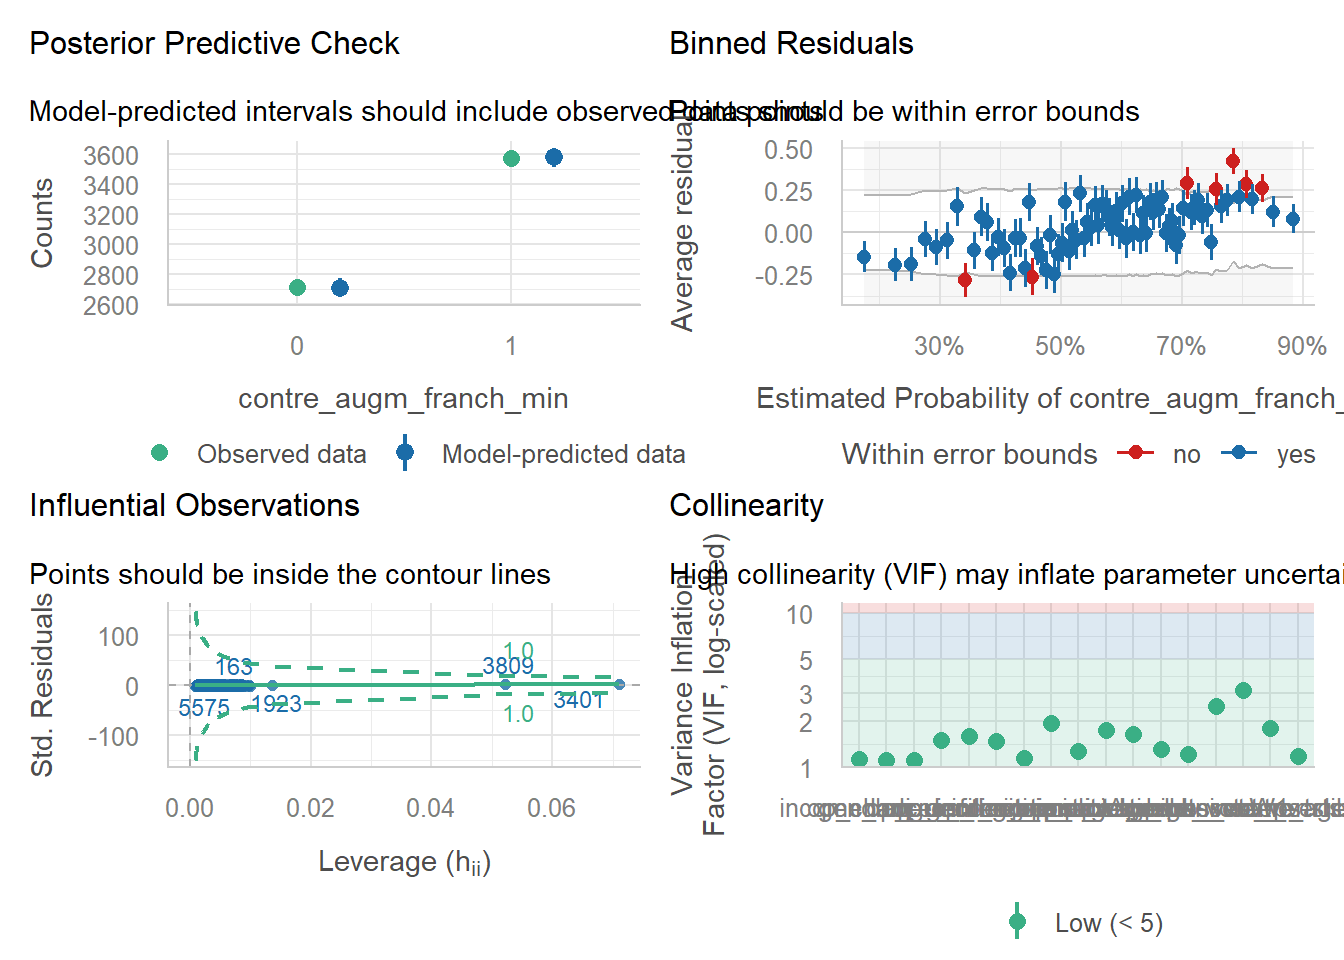

Ignoring unknown labels:
• size : ""
• alpha : ""

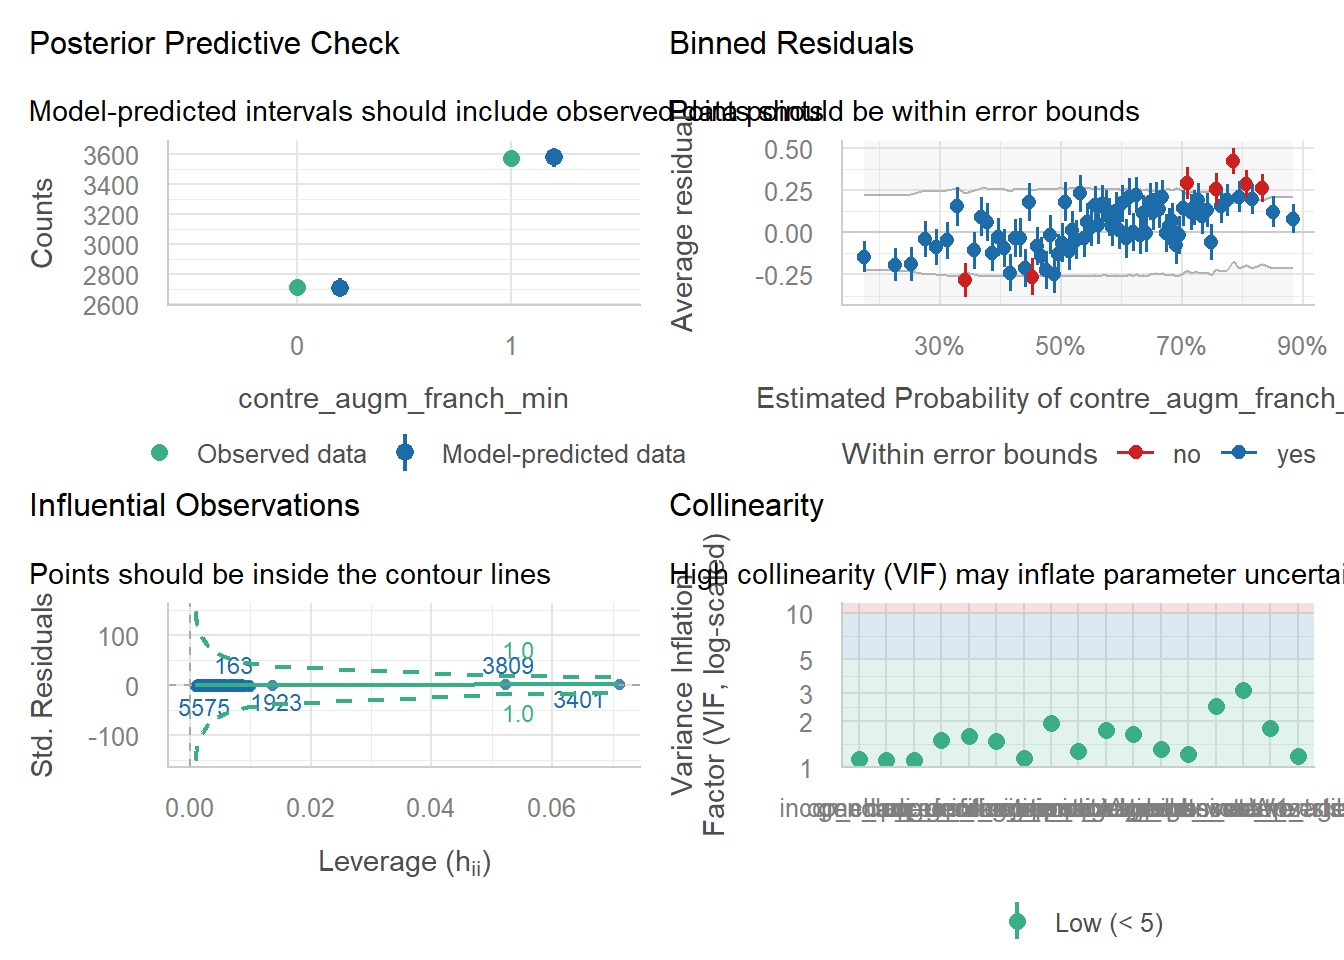

In [ ]:
#| label: fig-check1
#| fig-cap: "Vérification des hypothèses du modèle logit: augmentation de la franchise minimale"
library(performance)
library(ggplotify)

checkmodel1 <- 
check_model(model1_step2)

Cannot simulate residuals for models of class `glm`. Please try
  `check_model(..., residual_type = "normal")` instead.

Ignoring unknown labels:
• size : ""
• alpha : ""

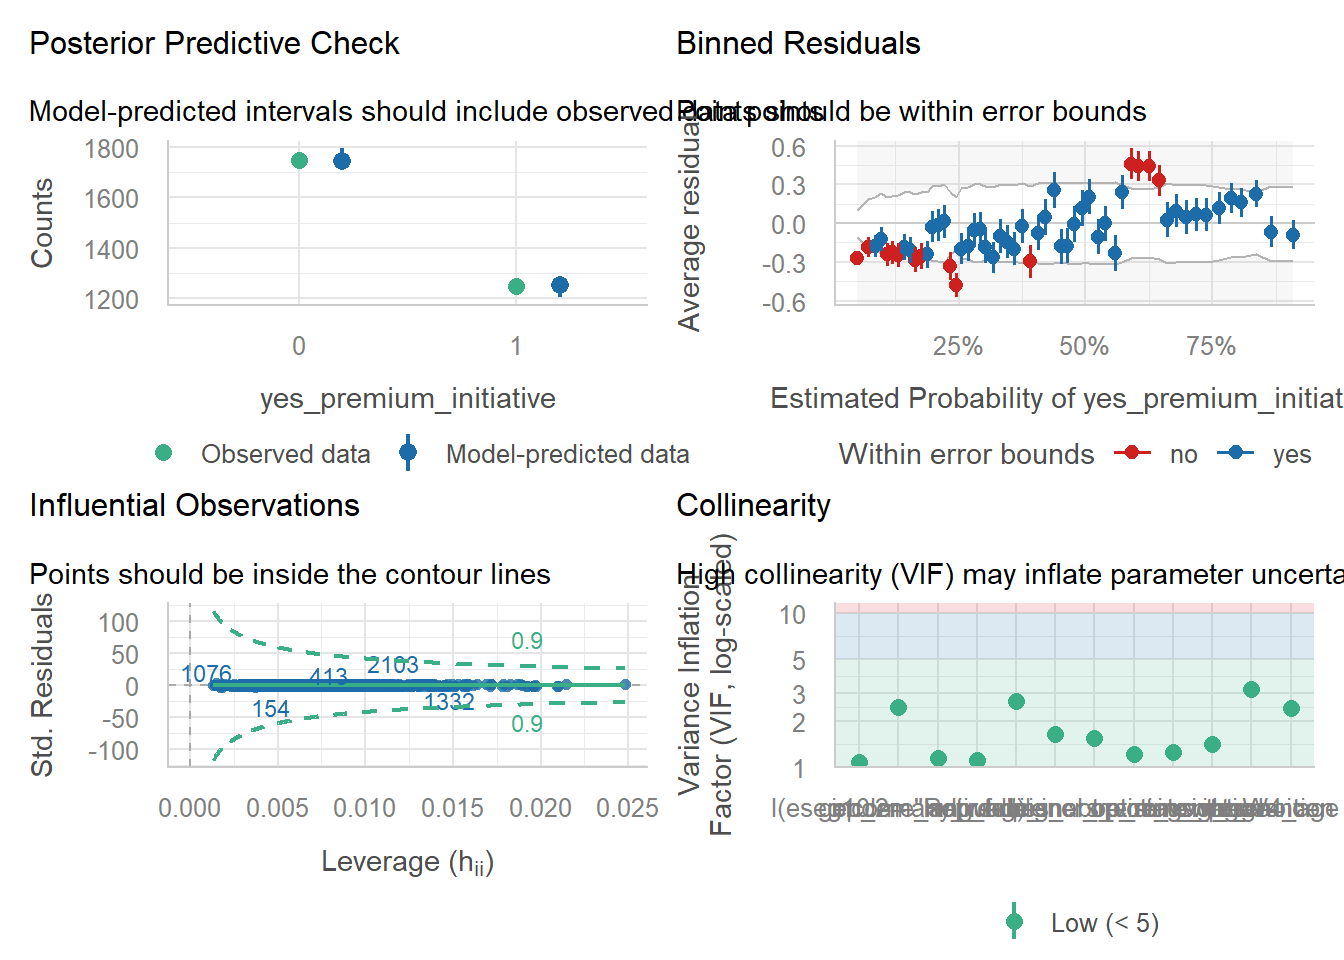

In [ ]:
#| label: fig-check2
#| fig-cap: "Vérification des hypothèse du modèle logit: initiative pour l'allègement des primes"

checkmodel2 <- 
check_model(best_model_glm2)